# Load libs and create subsets

In [1]:
library(DESeq2)
library(dplyr)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [2]:
colours <- c('#ff9301', '#592bf5', '#1fbd6b', '#919190', '#e377c2')
names(colours) <- c('HAstV4', 'MLB2', 'VA1', 'mock', 'mock_trypsin')

In [3]:
#load samples
samples=read.table("samples.tsv",header = T,check.names = F)
samples

condition,replicate,tissue,organoid.stage,organoid.line,timepoint,name,id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MLB2,s1,brain,NA,NA,10d,MLB2_brain_s1_10d_VL11,VL11
MLB2,s2,brain,NA,NA,10d,MLB2_brain_s2_10d_VL12,VL12
VA1,s1,brain,NA,NA,10d,VA1_brain_s1_10d_VL13,VL13
VA1,s2,brain,NA,NA,10d,VA1_brain_s2_10d_VL14,VL14
HAstV4,s1,brain,NA,NA,10d,HAstV4_brain_s1_10d_VL15,VL15
HAstV4,s2,brain,NA,NA,10d,HAstV4_brain_s2_10d_VL16,VL16
mock,s1,brain,NA,NA,10d,mock_brain_s1_10d_VL17,VL17
mock,s2,brain,NA,NA,10d,mock_brain_s2_10d_VL18,VL18
mock_trypsin,s1,brain,NA,NA,10d,mock_trypsin_brain_s1_10d_VL19,VL19


In [4]:
bsamples <- samples[samples$tissue=='brain',]# %>% filter(tissue == "brain")
#gsamples <- samples %>% filter(tissue == "gut")
#gundiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "undiff")
#gdiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "diff")

bsamples

,condition,replicate,tissue,organoid.stage,organoid.line,timepoint,name,id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,MLB2,s1,brain,NA,NA,10d,MLB2_brain_s1_10d_VL11,VL11
2,MLB2,s2,brain,NA,NA,10d,MLB2_brain_s2_10d_VL12,VL12
3,VA1,s1,brain,NA,NA,10d,VA1_brain_s1_10d_VL13,VL13
4,VA1,s2,brain,NA,NA,10d,VA1_brain_s2_10d_VL14,VL14
5,HAstV4,s1,brain,NA,NA,10d,HAstV4_brain_s1_10d_VL15,VL15
6,HAstV4,s2,brain,NA,NA,10d,HAstV4_brain_s2_10d_VL16,VL16
7,mock,s1,brain,NA,NA,10d,mock_brain_s1_10d_VL17,VL17
8,mock,s2,brain,NA,NA,10d,mock_brain_s2_10d_VL18,VL18
9,mock_trypsin,s1,brain,NA,NA,10d,mock_trypsin_brain_s1_10d_VL19,VL19


In [5]:
#load genes
genes <- readRDS('../../rds/NGS-20250519/genes.rds')
dim(genes)

[1] 62757     7

In [6]:
#counts = as.matrix(read.csv('../../output/NGS-20250519/counts_analysis/counts_all_genes.csv',row.names = 1))
#dim(counts)

In [6]:
#load protein_coding counts
pccounts = as.matrix(read.csv('../../output/NGS-20250519/counts_protein_coding.csv',row.names = 1))
dim(pccounts)

[1] 20070    16

In [7]:
#take brain counts
# Сформировать вектор нужных ID
brain_ids <- paste0("VL", 11:20)

# Отфильтровать только нужные столбцы
bpccounts <- pccounts[, brain_ids]

# Проверка
dim(bpccounts)
colnames(bpccounts)


[1] 20070    10

[1] "VL11" "VL12" "VL13" "VL14" "VL15" "VL16" "VL17" "VL18" "VL19" "VL20"

In [9]:
#write.table(pccounts, file = "../../output/NGS-20250519/counts_protein_coding.tsv", sep = "\t", row.names = TRUE)

In [8]:
rownames(bsamples) = bsamples$id
colnames(bpccounts) == rownames(bsamples)
bpccounts = bpccounts[,rownames(bsamples)]
bpccounts

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

,VL11,VL12,VL13,VL14,VL15,VL16,VL17,VL18,VL19,VL20
ENSG00000142611,291,390,684,576,693,769,591,594,938,607
ENSG00000157911,204,176,213,224,243,267,150,187,211,218
ENSG00000142655,391,377,399,364,414,438,477,356,423,320
ENSG00000149527,227,236,270,301,288,314,315,263,370,325
ENSG00000171621,191,146,242,129,136,156,301,122,189,124
ENSG00000142583,0,2,0,0,0,1,1,0,4,4
ENSG00000173614,195,176,247,218,283,306,169,203,220,228
ENSG00000162592,1,2,5,8,13,2,5,5,14,8
ENSG00000204624,704,456,519,380,428,407,544,387,692,606
ENSG00000142606,7,18,19,20,30,26,41,26,18,19


In [9]:
rownames(bsamples) = colnames(bpccounts) = bsamples$name
deseq = DESeqDataSetFromMatrix(countData = bpccounts,
                              colData = bsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 10 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(10): MLB2_brain_s1_10d_VL11 MLB2_brain_s2_10d_VL12 ...
  mock_trypsin_brain_s1_10d_VL19 mock_trypsin_brain_s2_10d_VL20
colData names(8): condition replicate ... name id


FALSE  TRUE 
 3535 16535 

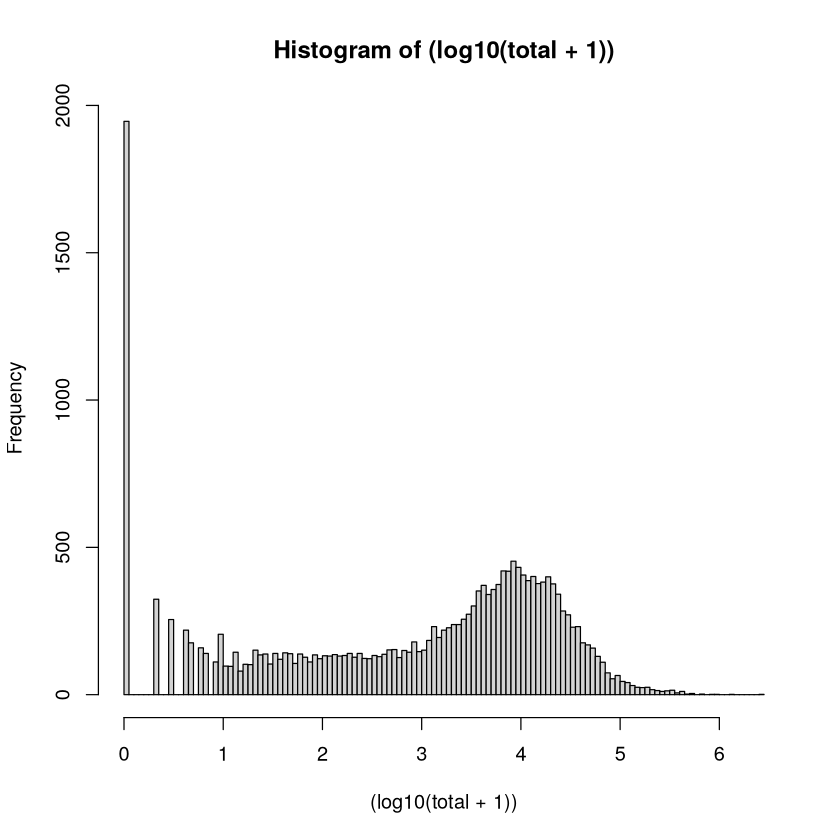

In [10]:
# filter genes by total read counts (true if >10 reads)
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)

In [11]:
# filter genes (Counting the number of samples where each gene has ≥10 reads (e.g., 459 genes have ≥10 reads in two samples))
nbsamples10 = rowSums(counts(deseq)>=10)
table(nbsamples10)

nbsamples10
    0     1     2     3     4     5     6     7     8     9    10 
 4804   509   279   210   188   169   157   175   236   432 12911 

In [12]:
dim(deseq)

[1] 20070    10

In [13]:
# remove genes with less than 10 reads in total in at least 2 samples.
deseq = deseq[nbsamples10>=2,]
deseq

class: DESeqDataSet 
dim: 14757 10 
metadata(1): version
assays(1): counts
rownames(14757): ENSG00000142611 ENSG00000157911 ... ENSG00000276345
  ENSG00000271254
rowData names(0):
colnames(10): MLB2_brain_s1_10d_VL11 MLB2_brain_s2_10d_VL12 ...
  mock_trypsin_brain_s1_10d_VL19 mock_trypsin_brain_s2_10d_VL20
colData names(8): condition replicate ... name id

In [14]:
#pre-filtering, to keep genes that have at least 10 reads in 3 or more samples
smallestGroupSize <- 3
keep <- rowSums(counts(deseq) >= 10) >= smallestGroupSize
deseq <- deseq[keep,]

In [15]:
dim(deseq)

[1] 14478    10

## all viruses together (independentFiltering=TRUE)

In [16]:
deseq = DESeq(deseq)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [17]:
#deseq with where contrast using Mock/virus
cnds = c('MLB2','VA1','HAstV4','mock_trypsin')
res = lapply(cnds,function(c)results(deseq,contrast = c('condition',c, 'mock'), independentFiltering=TRUE))
names(res) = paste0(cnds,'/mock')

In [18]:
res[['HAstV4/mock_trypsin']] = results(deseq,contrast = c('condition','HAstV4', 'mock_trypsin'), independentFiltering=TRUE)

In [20]:
for(n in names(res)){
    res[[n]]$padj[is.na(res[[n]]$padj)] = 2
}

In [19]:
levels(deseq$condition)

[1] "HAstV4"       "MLB2"         "mock"         "mock_trypsin" "VA1"

In [21]:
res

$`MLB2/mock`
log2 fold change (MLE): condition MLB2 vs mock 
Wald test p-value: condition MLB2 vs mock 
DataFrame with 14478 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat     pvalue
                <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000142611   598.795     -0.6572923  0.226427 -2.902882 0.00369745
ENSG00000157911   207.286      0.3196123  0.273972  1.166587 0.24337739
ENSG00000142655   393.673      0.0280025  0.224295  0.124847 0.90064478
ENSG00000149527   288.530     -0.1756090  0.236331 -0.743064 0.45744281
ENSG00000171621   172.989     -0.1802342  0.436534 -0.412876 0.67969762
...                   ...            ...       ...       ...        ...
ENSG00000273748  525.6425      -0.531533  0.236642 -2.246152  0.0246943
ENSG00000277196   27.1786       0.264477  0.621572  0.425497  0.6704746
ENSG00000278817   38.8743       0.391551  0.539683  0.725521  0.4681327
ENSG00000276345   37.7318       1.133175  0.565602  2.003484  0.

In [51]:
saveRDS(res,'../../rds/NGS-20250519/deseq2_brain_all comparison.rds')

Loading required package: ggplot2

Loading required package: ggrepel



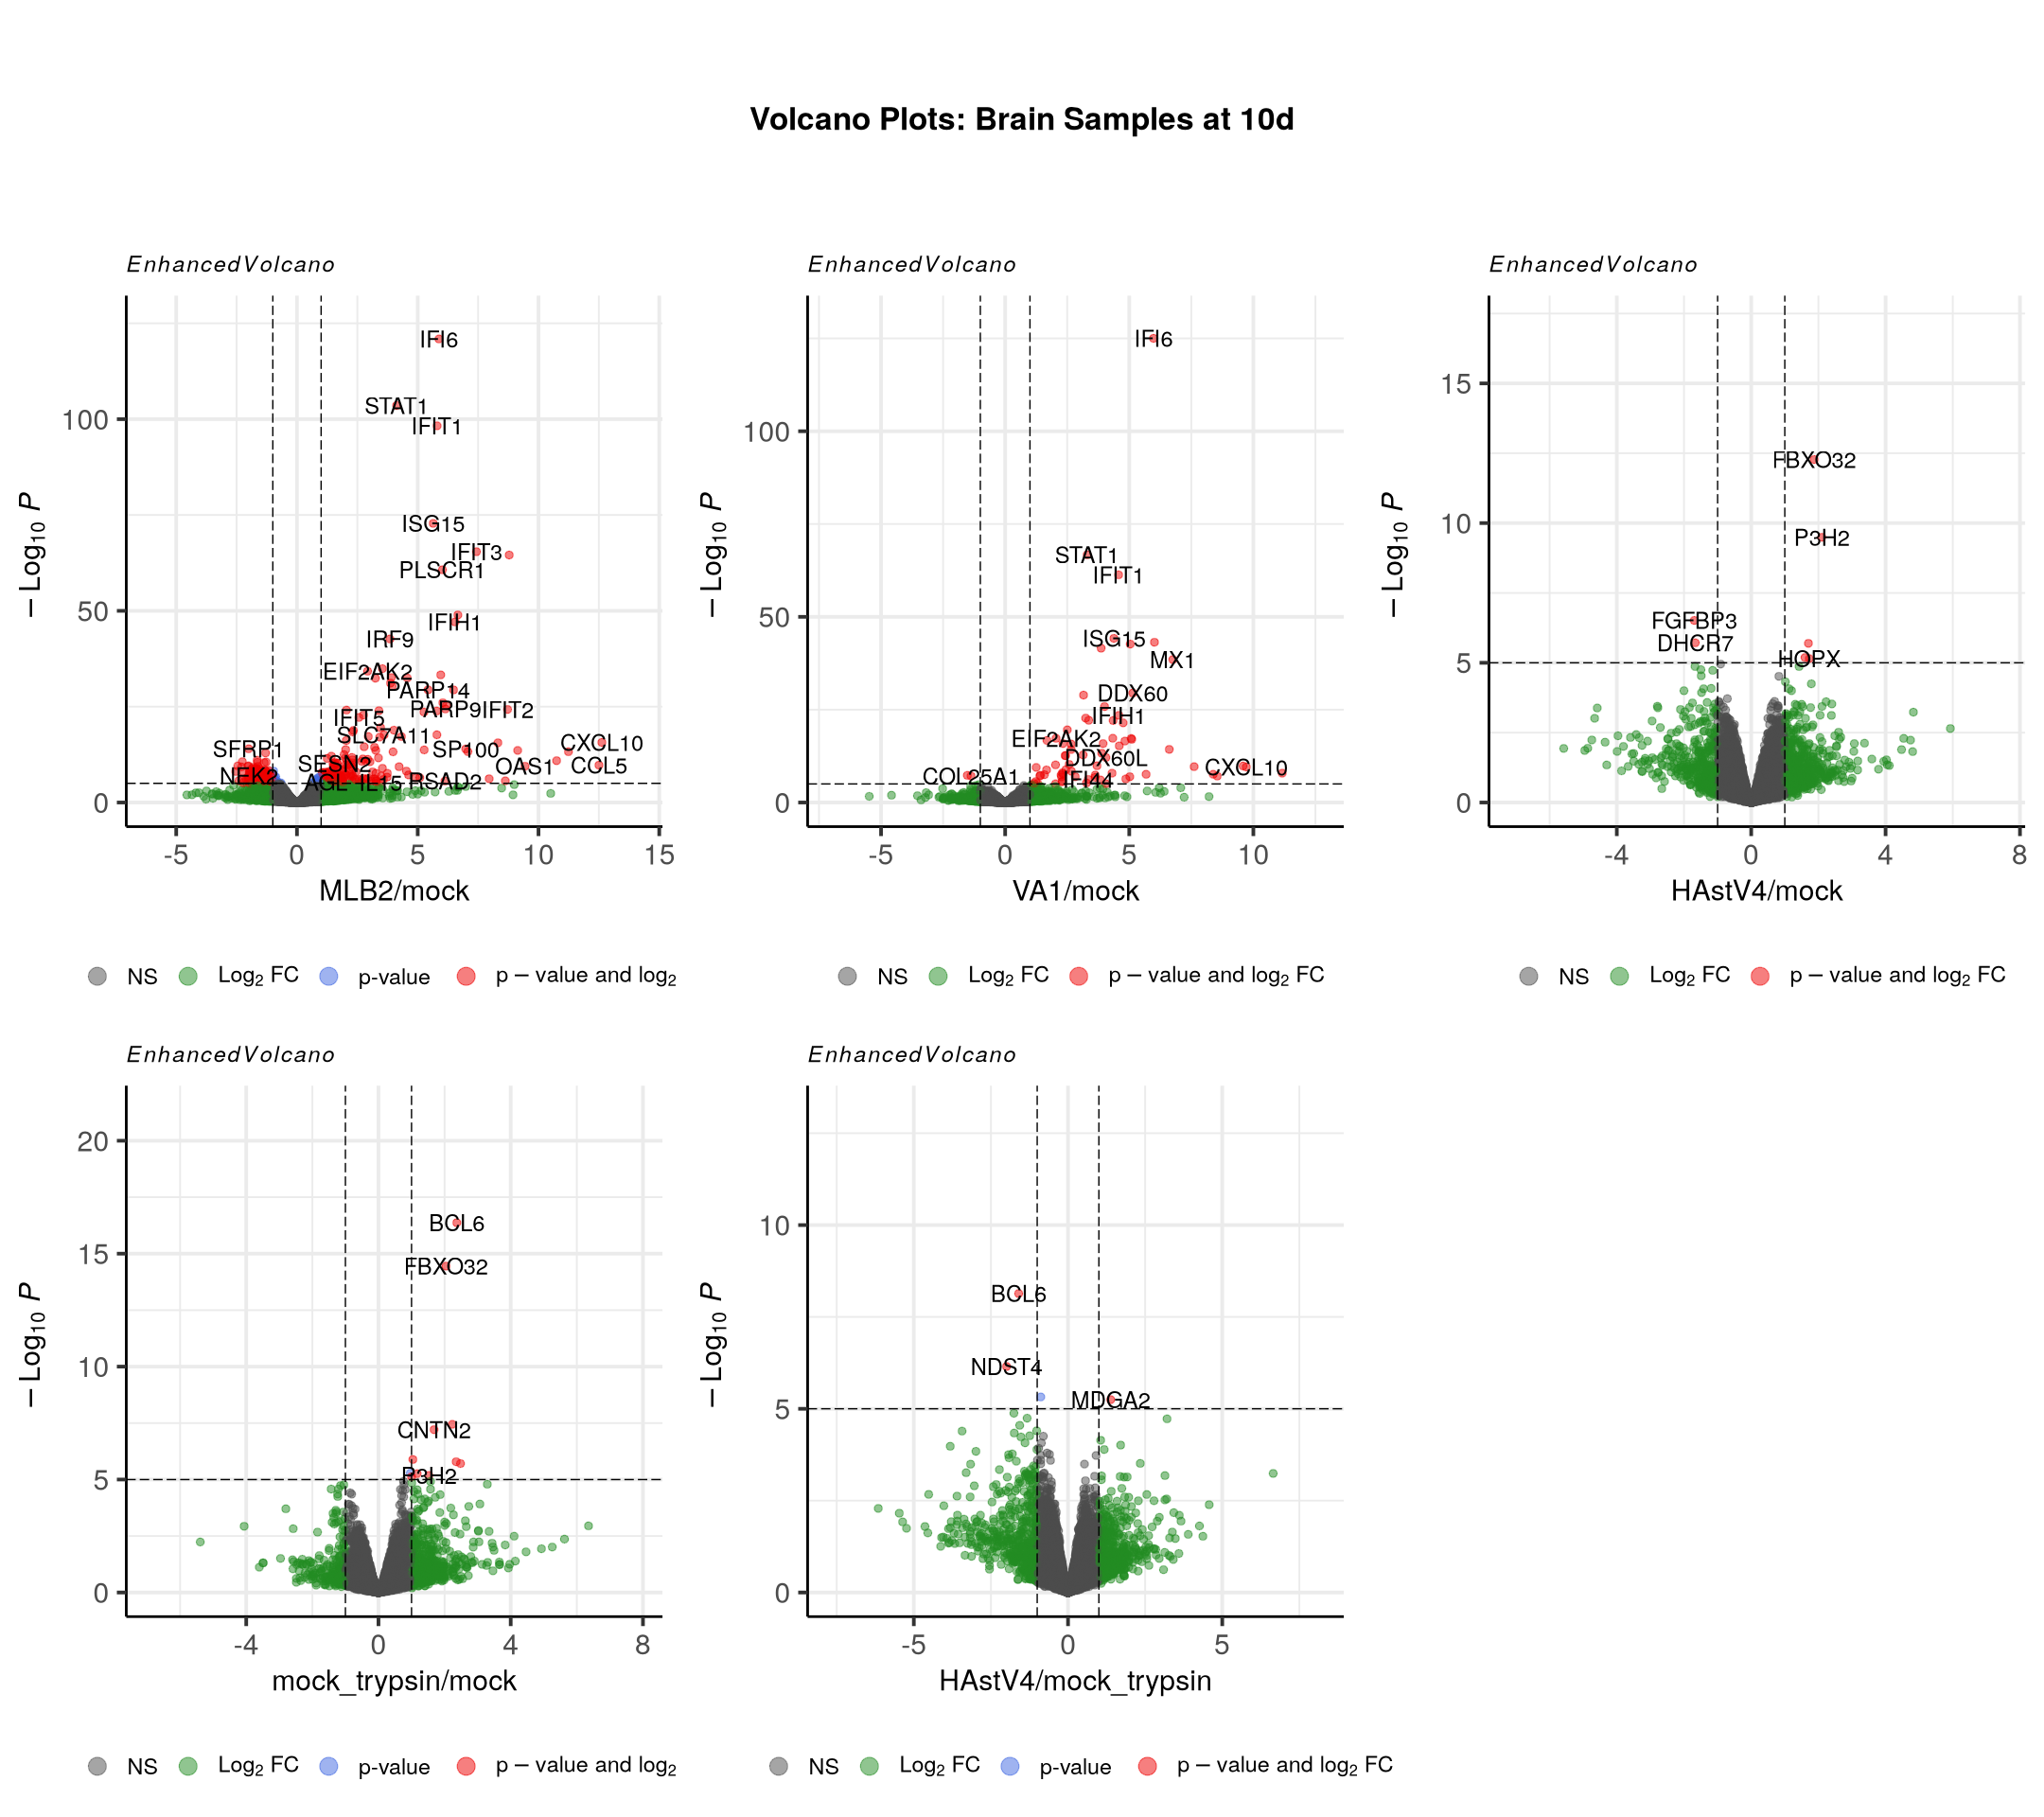

In [22]:
options(repr.plot.width = 18, repr.plot.height = 16)  # Increase height for legends

library(EnhancedVolcano)
library(cowplot)
library(ggplot2)  # Нужно для `ggdraw()`

plots = list()
for (vir_name in names(res)) {
    r = res[[vir_name]]
    plots[[vir_name]] = EnhancedVolcano(r,
        lab = genes[rownames(r), 'gene_name'],
        x = 'log2FoldChange',
        y = 'pvalue',
        xlab = vir_name, #paste0('log2(Mock/', vir_name, ')'),
        title = NULL,  # Remove individual titles
        caption = NULL
    ) + theme(legend.position = "bottom")  # Move legend below each plot
}

# Create a common title with more space
title <- ggdraw() + draw_label("Volcano Plots: Brain Samples at 10d", 
                               fontface = 'bold', size = 20, hjust = 0.5)

# Arrange all plots in one row with enough space for the title & legends
final_plot <- plot_grid(title, 
                        plot_grid(plotlist = plots, nrow = 2, ncol = 3, 
                                  align = "hv", rel_widths = c(1.5, 1.5, 1.5)), 
                        ncol = 1, rel_heights = c(0.15, 1))  # More space for title

# Display the final plot
print(final_plot)

In [46]:
ggsave("06_volcano_brain_10d_5plots.png", final_plot, width = 24, height = 10, dpi = 300)

# код, чтобы плоты были в определенном порядке

options(repr.plot.width = 18, repr.plot.height = 16)

library(EnhancedVolcano)
library(cowplot)
library(ggplot2)  # для ggdraw()

plot_order <- c("HAstV4/mock_trypsin", "HAstV4/mock", "mock_trypsin/mock", "MLB2/mock", "VA1/mock")

plots = list()
for (name in plot_order) {
    r = res[[name]]
    plots[[name]] = EnhancedVolcano(
        r,
        lab = genes[rownames(r), 'gene_name'],
        x = 'log2FoldChange',
        y = 'pvalue',
        xlab = name,
        title = NULL,
        caption = NULL
    ) + theme(legend.position = "bottom")  # Легенда под каждым графиком
}

title <- ggdraw() + draw_label(
    "Volcano Plots: Brain Samples at 10d",
    fontface = 'bold', size = 20, hjust = 0.5
)

final_5plots <- plot_grid(
    title,
    plot_grid(plotlist = plots[plot_order], nrow = 2, ncol = 3, align = "hv"),
    ncol = 1,
    rel_heights = c(0.15, 1)
)

print(final_5plots)

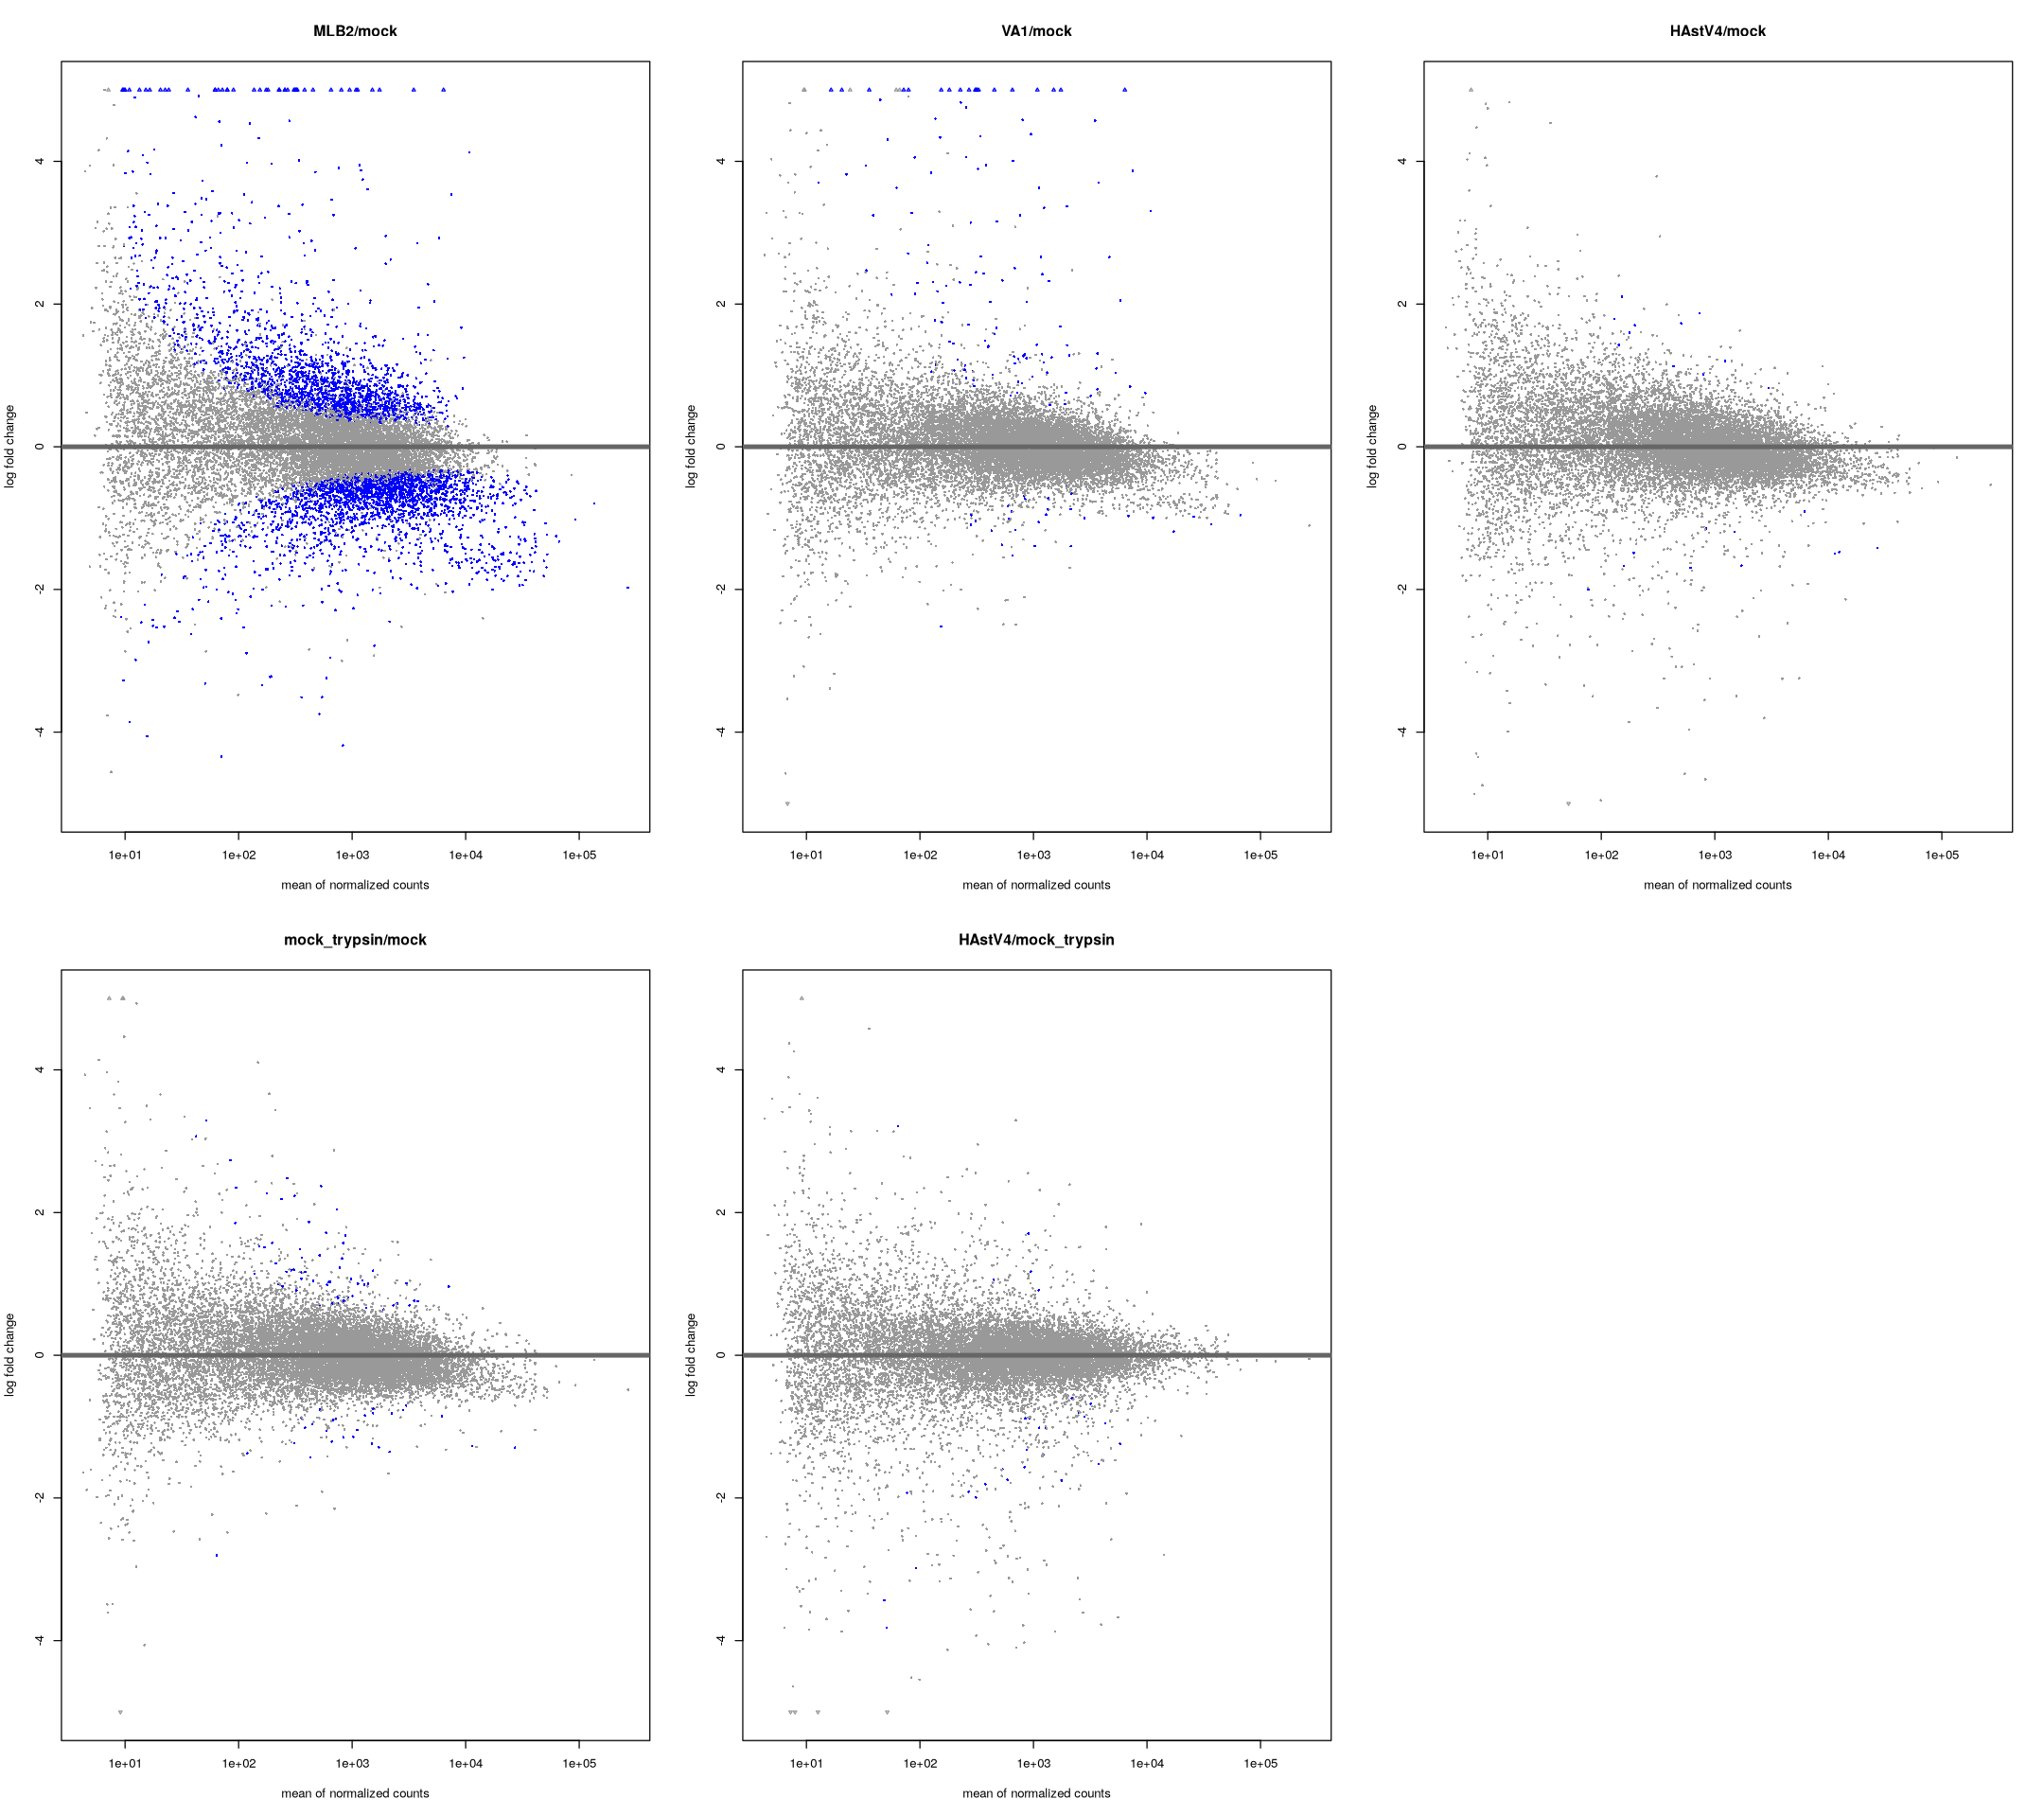

In [23]:
# Загружаем нужную библиотеку
#library(DESeq2)

# Создаем MA-плоты для каждого сравнения
par(mfrow = c(2, 3)) # 2 строки, 3 колонки — под 5 графиков
for (name in names(res)) {
  plotMA(res[[name]], main = name, ylim = c(-5, 5))
}


In [24]:
summary(res[["MLB2/mock"]])


out of 14478 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1892, 13%
LFC < 0 (down)     : 2235, 15%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



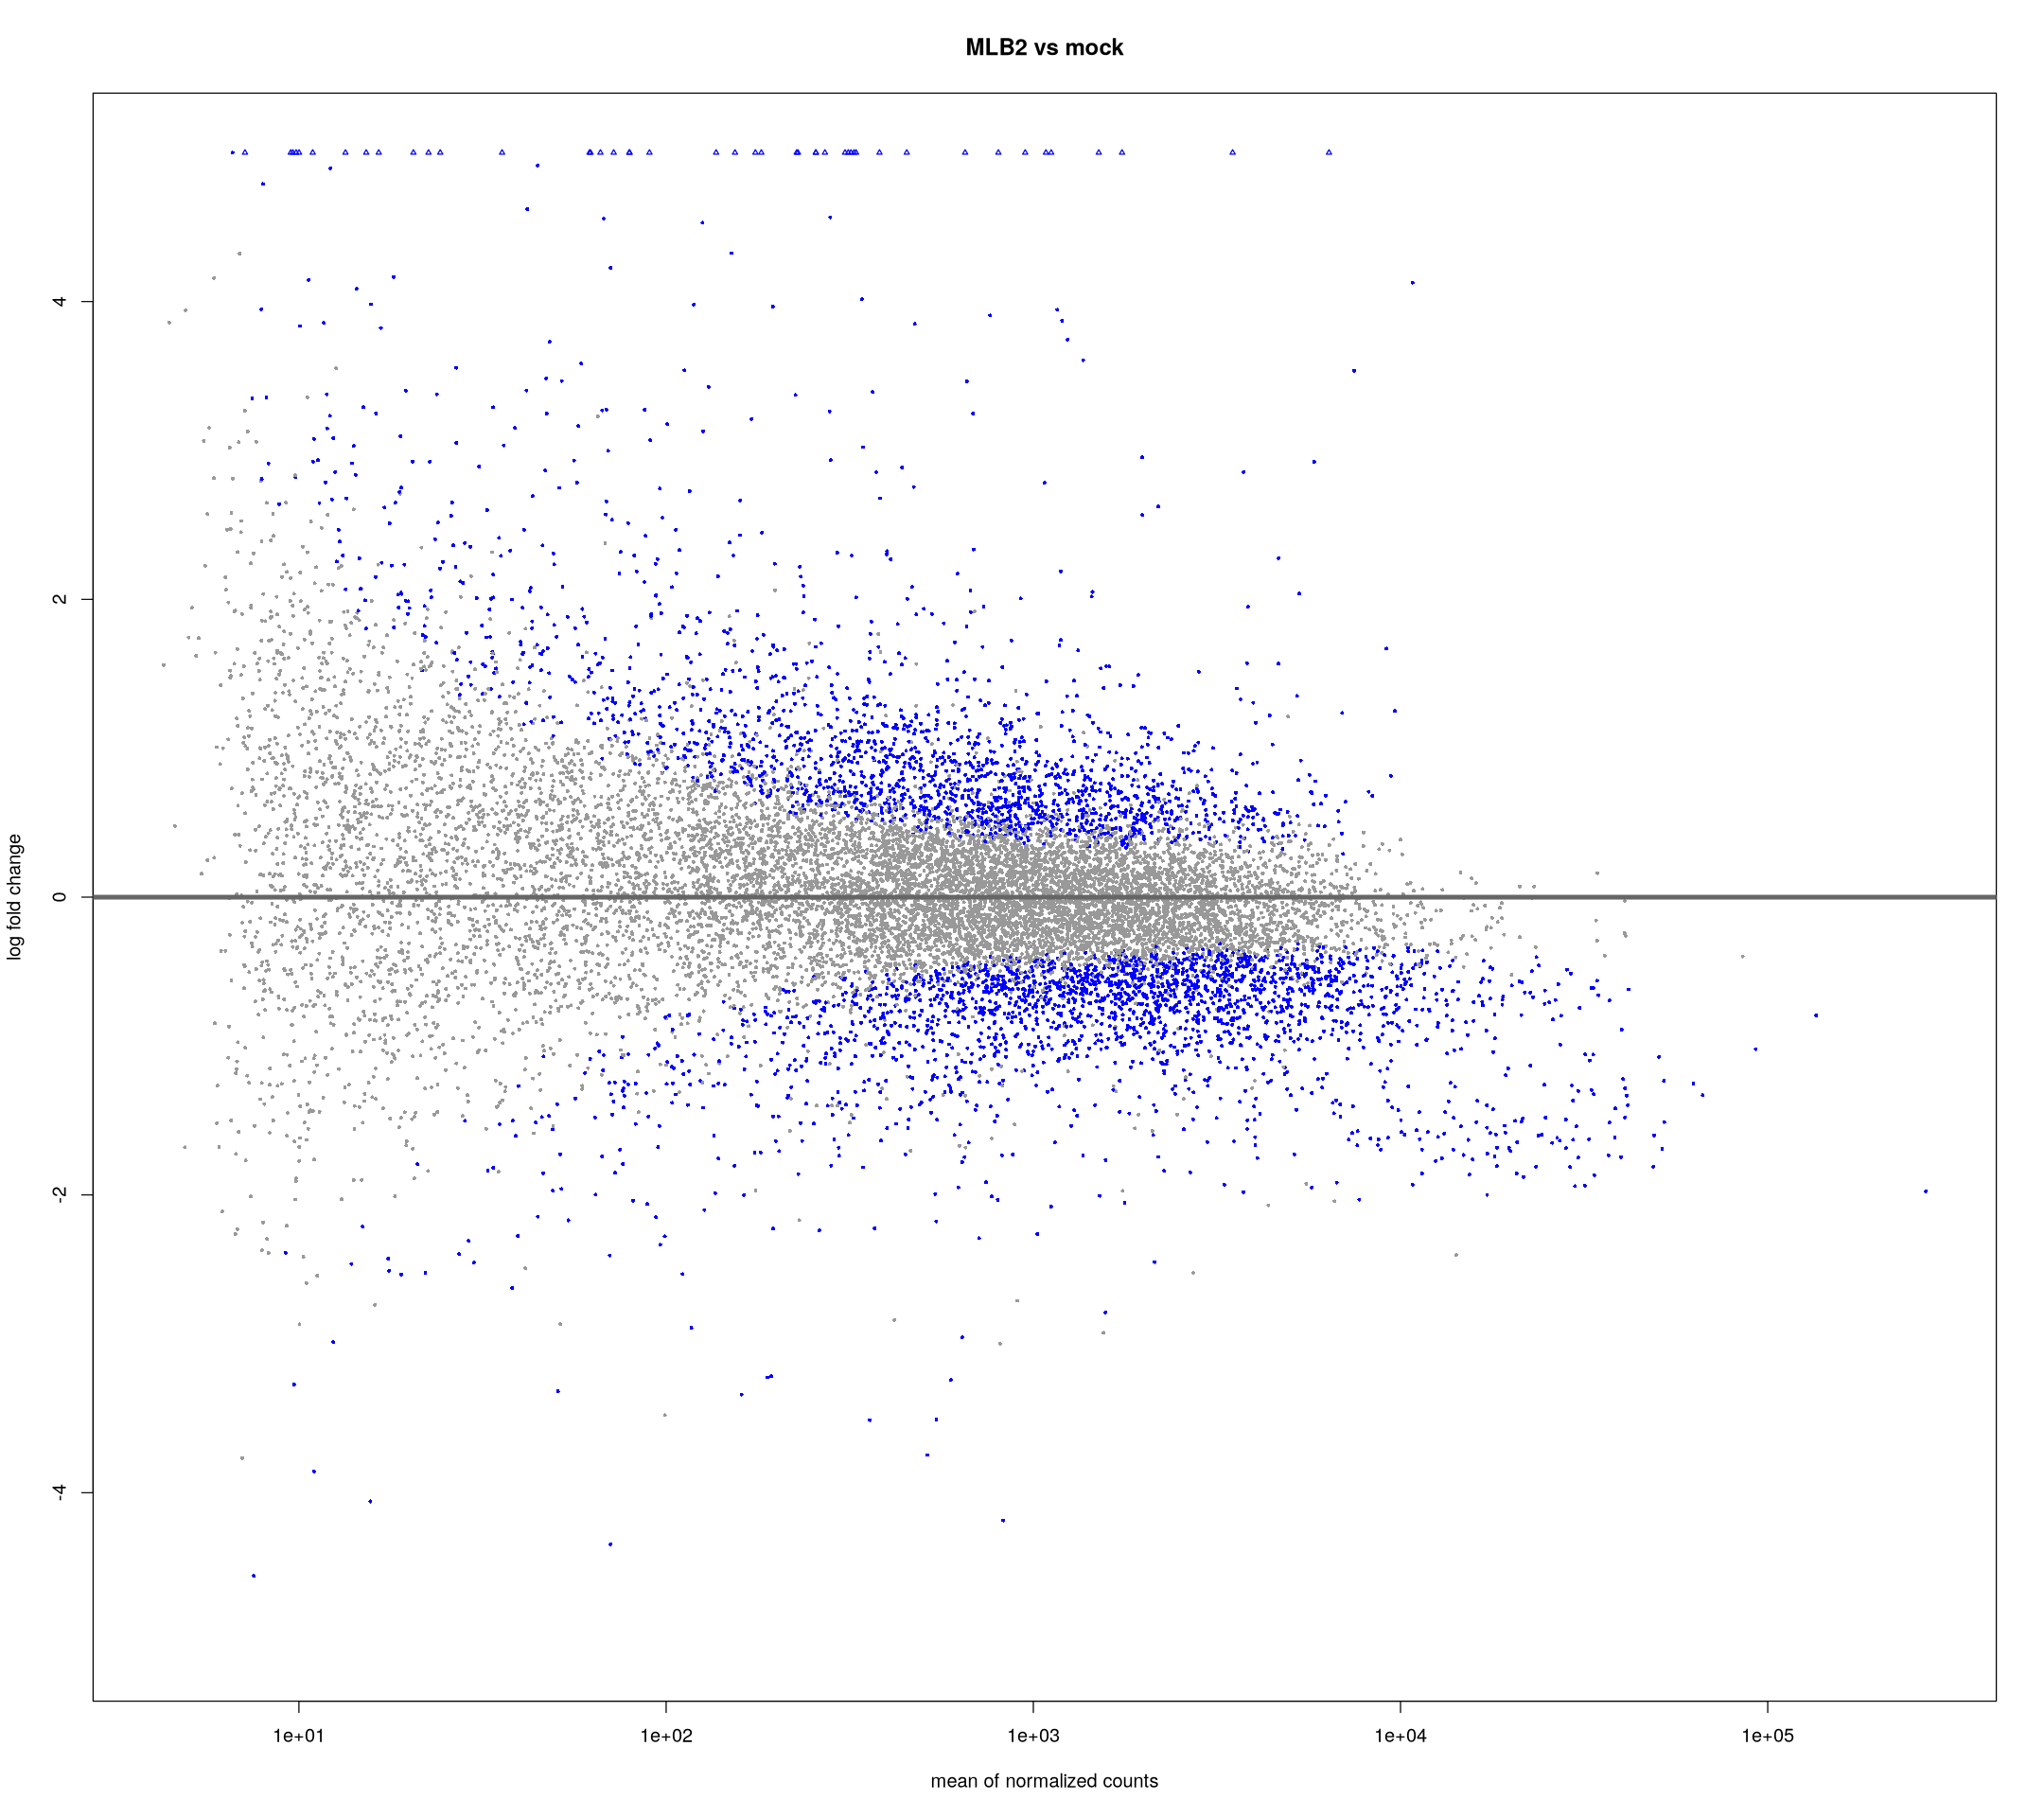

In [54]:
plotMA(res[["MLB2/mock"]], alpha = 0.1, main = "MLB2 vs mock", ylim = c(-5, 5))

In [96]:
#deseq with where contrast using virus/Mock
#cnds = c('MLB2','VA1','HAstV4')
#res = lapply(cnds,function(c)results(deseq,contrast = c('condition','Mock',c)))
#names(res) = cnds

In [26]:
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>0))
})

MLB2/mock.sign            VA1/mock.sign         HAstV4/mock.sign 
                    3153                      114                       15 
  mock_trypsin/mock.sign HAstV4/mock_trypsin.sign 
                      54                        8

In [27]:
#This returns a named vector with the count of significantly differentially expressed genes for each condition
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

MLB2/mock.sign            VA1/mock.sign         HAstV4/mock.sign 
                    1162                       99                       13 
  mock_trypsin/mock.sign HAstV4/mock_trypsin.sign 
                      37                        7

In [62]:
lapply(res, function(x) {
    f = x$padj < 0.05 & abs(x$log2FoldChange) > 1  # Add log2FoldChange condition
    f[is.na(f)] = FALSE  # Handle NA values
    x = as.data.frame(x[f, c(1,2,6)])  # Select relevant columns
    x$gene_name = genes[rownames(x), 'gene_name']  # Add gene names
    x[order(x$log2FoldChange), ]  # Order by log2FoldChange
})


,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000162398,7.537016,-4.557966,4.863351e-02,LEXM
ENSG00000166863,70.629855,-4.345283,4.598327e-02,TAC3
ENSG00000175445,828.249589,-4.185575,1.984224e-02,LPL
ENSG00000125813,15.657327,-4.058314,1.885974e-02,PAX1
ENSG00000068078,514.441642,-3.746809,8.645243e-03,FGFR3
ENSG00000197705,358.662424,-3.511979,2.785929e-02,KLHL14
ENSG00000008441,544.291210,-3.507376,3.560747e-02,NFIX
ENSG00000109846,160.382838,-3.340169,1.170134e-02,CRYAB
ENSG00000181965,50.735221,-3.318039,4.463082e-02,NEUROG1


In [65]:
#rds without gene_id
# Создаём папку для сохранения
dir.create("deg_0.05_1", showWarnings = FALSE)

# Пройтись по всем результатам и сохранить отфильтрованные DEG
lapply(names(res), function(name) {
  x <- res[[name]]
  f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1
  f[is.na(f)] <- FALSE
  x_df <- as.data.frame(x[f, c(1, 2, 6)])
  x_df$gene_name <- genes[rownames(x_df), "gene_name"]
  x_df <- x_df[order(x_df$log2FoldChange), ]

  # Сохраняем результат как RDS
  saveRDS(x_df, file = file.path("deg_0.05_1", paste0(gsub("/", "_", name), ".rds")))
})


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

In [68]:
# Создаём папку для сохранения
dir.create("deg_filtered_rds", showWarnings = FALSE)

# Пройтись по всем результатам и сохранить отфильтрованные DEG
lapply(names(res), function(name) {
  x <- res[[name]]
  f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1
  f[is.na(f)] <- FALSE
  x_df <- as.data.frame(x[f, c(1, 2, 6)])
  
  # Добавим gene_id как колонку
  x_df$gene_id <- rownames(x_df)
  
  # Добавим gene_name из внешнего объекта genes
  x_df$gene_name <- genes[rownames(x_df), "gene_name"]
  
  # Переставим колонки: gene_id, gene_name, всё остальное
  x_df <- x_df[, c("gene_id", "gene_name", setdiff(colnames(x_df), c("gene_id", "gene_name")))]
  
  # Сортировка по log2FC
  x_df <- x_df[order(x_df$log2FoldChange), ]
  
  # Сохраняем
  saveRDS(x_df, file = file.path("deg_filtered_rds", paste0(gsub("/", "_", name), ".rds")))
})


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

In [69]:
# Установка пакета (если нужно)
#install.packages("openxlsx")

#library(openxlsx)

# Создаем новый Excel-файл
wb <- createWorkbook()

# Путь к папке с DEG rds
files <- list.files("deg_filtered_rds", pattern = "\\.rds$", full.names = TRUE)

for (f in files) {
  df <- readRDS(f)
  sheet_name <- gsub("\\.rds$", "", basename(f))
  
  addWorksheet(wb, sheet_name)
  writeData(wb, sheet = sheet_name, x = df)
  
  # Найдем колонки для форматирования
  col_lfc <- which(colnames(df) == "log2FoldChange")
  col_padj <- which(colnames(df) == "padj")
  
  # Цветовая шкала для log2FoldChange: синий-белый-красный
  conditionalFormatting(
    wb, sheet = sheet_name,
    cols = col_lfc,
    rows = 2:(nrow(df) + 1),
    style = c("#4575B4", "#F7F7F7", "#D73027"),
    type = "colourScale"
  )
  
  # Цветовая шкала для padj: зеленый (низкие) -> белый (высокие)
  conditionalFormatting(
    wb, sheet = sheet_name,
    cols = col_padj,
    rows = 2:(nrow(df) + 1),
    style = c("#00FF00", "#FFFFFF"),
    type = "colourScale"
  )
}

# Сохраняем файл
saveWorkbook(wb, file = "DEG_results.xlsx", overwrite = TRUE)


In [64]:
lapply(names(res), function(cond) {
    x <- res[[cond]]  # Extract results for each virus
    
    # Apply filtering: padj < 0.1 and abs(log2FoldChange) > 1
    f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1
    f[is.na(f)] <- FALSE  # Handle NA values

    # Convert to dataframe and add gene names
    df <- as.data.frame(x[f, c(1, 2, 6)])  
    df$gene_name <- genes[rownames(df), 'gene_name']

    # Sort by log2FoldChange
    df <- df[order(df$log2FoldChange), ]

    # Save to CSV file
    filename <- paste0(cond, "_brain_Significant_Genes.csv")  
    write.csv(df, file = filename, row.names = FALSE)

    # Print first few rows for review
    cat("\nFirst few rows for", cond, ":\n")
    print(head(df))

    return(df)  # Optional: return dataframe
})


Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file 'MLB2/mock_brain_Significant_Genes.csv': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection
